In [1]:
import pandas as pd

In [2]:
sv = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [3]:
sv.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [4]:
sv.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [5]:
sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB


In [6]:
sv.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [7]:
sv.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)
sv.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [9]:
sv.head()

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,3,6,5,11
2,3,3,4,3,6
3,1,0,3,2,48
4,3,1,6,5,6


In [14]:
y = sv['Class']
x = sv[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=2529)

In [17]:
from sklearn.linear_model import LinearRegression
modelx = LinearRegression()

In [18]:
modelx.fit(x_train, y_train)

LinearRegression()

In [19]:
y_predict = modelx.predict(x_test)

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(y_test,y_predict)
accuracy = 100 - (error) * 100
accuracy

17.317953618253668

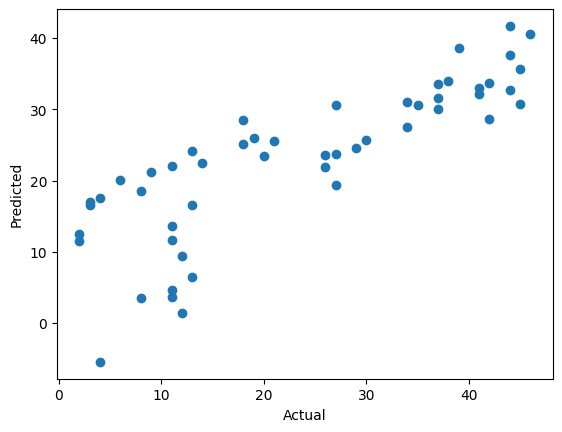

In [23]:
import matplotlib.pyplot as plt 
plt.scatter(y_test,y_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()